In [1]:
%matplotlib inline

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/adonismaomao/Data sets/amazon_baby.csv')
df.head(),len(df)

(                                                name  \
 0                           Planetwise Flannel Wipes   
 1                              Planetwise Wipe Pouch   
 2                Annas Dream Full Quilt with 2 Shams   
 3  Stop Pacifier Sucking without tears with Thumb...   
 4  Stop Pacifier Sucking without tears with Thumb...   
 
                                               review  rating  
 0  These flannel wipes are OK, but in my opinion ...       3  
 1  it came early and was not disappointed. i love...       5  
 2  Very soft and comfortable and warmer than it l...       5  
 3  This is a product well worth the purchase.  I ...       5  
 4  All of my kids have cried non-stop when I trie...       5  , 183531)

In [3]:
#build a word counter

def word_count(review):
    wordcount ={}
    words = review.split()
    for word in words:
        if word not in wordcount:
            wordcount[word] = 1
        else:    
            wordcount[word] += 1
    return wordcount

In [4]:
# create the word count column by applying the word_count function

df['word_count'] = df['review'].astype(str).apply(lambda x: word_count(x))

In [5]:
df['word_count'] 

0         {u'and': 5, u'stink': 1, u'Blue-12': 1, u'orde...
1         {u'and': 3, u'love': 1, u'it': 2, u'highly': 1...
2         {u'and': 2, u'quilt': 1, u'it': 1, u'comfortab...
3         {u'and': 3, u'ingenious': 1, u'What': 1, u'lov...
4         {u'and': 2, u'it.This': 1, u'all': 1, u'help':...
5         {u'and': 2, u'cute': 1, u'would': 1, u'help': ...
6         {u'Barnes': 1, u'is': 1, u'bound': 1, u'as': 1...
7         {u'Perfect': 1, u'and': 2, u'all': 1, u'would'...
8         {u'and': 1, u'help': 1, u'Pinterest': 1, u'is'...
9         {u'options.I': 1, u'journal.': 1, u'all': 1, u...
10        {u'forget': 1, u'just': 1, u'sleep': 1, u'milk...
11        {u'and': 1, u'is': 1, u'in': 1, u'it': 1, u'ch...
12        {u'all': 1, u'Also,': 1, u'just': 1, u'-': 6, ...
13        {u'forget': 1, u'just': 1, u'able': 1, u'month...
14        {u'info': 1, u'and': 1, u'what': 1, u'wanted!!...
15        {u'and': 3, u'would': 1, u'useful': 1, u'have'...
16        {u'and': 1, u'little': 1, u'lo

In [6]:
#throw away the neutral ratings and classify rating 4,5 as positive ratings 
#and 1, 2 as negative ratings

df = df[df['rating'] !=3]
df['sentiment'] = df['rating'] >= 4
df['sentiment'] = df['sentiment'].astype(int)

In [7]:
df = df.dropna()

## using all the words in reviews

In [8]:
vect = CountVectorizer()

In [9]:
X = vect.fit_transform(df['review'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
X_train

<132543x64130 sparse matrix of type '<type 'numpy.int64'>'
	with 7062424 stored elements in Compressed Sparse Row format>

In [11]:
clf1 = LogisticRegression(n_jobs=-1)

In [12]:
clf1.fit(X_train, y_train)

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
y_test_hat = clf1.predict(X_test)

In [14]:
clf1.score(X_test, y_test)

0.93161516175760506

In [15]:
 #roc
def plot_roc(y_test, y_test_hat):   
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_hat)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    #plotting
    
    plt.figure(1)
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='best', fontsize=10)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    

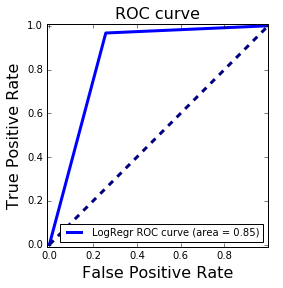

In [16]:
plot_roc(y_test, y_test_hat)

## using a selection of words

In [17]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [18]:
def count_selected_word(word, review):
    if word in review.keys():
        return review[word]
    else:
        return 0

In [19]:
for word in selected_words:
    df[word] = df['word_count'].apply(lambda x: count_selected_word(word, x))
   

In [20]:
df.head()

,name,review,rating,word_count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{u'and': 3, u'love': 1, u'it': 2, u'highly': 1...",1,0,0,0,0,1,0,0,0,0,0,0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{u'and': 2, u'quilt': 1, u'it': 1, u'comfortab...",1,0,0,0,0,0,0,0,0,0,0,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{u'and': 3, u'ingenious': 1, u'What': 1, u'lov...",1,0,0,0,0,2,0,0,0,0,0,0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{u'and': 2, u'it.This': 1, u'all': 1, u'help':...",1,0,1,0,0,0,0,0,0,0,0,0
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{u'and': 2, u'cute': 1, u'would': 1, u'help': ...",1,0,1,0,0,0,0,0,0,0,0,0


In [21]:
import numpy as np

for word in selected_words:
    print(word, df[word].sum())
    

('awesome', 1600)
('great', 34442)
('fantastic', 752)
('amazing', 1111)
('love', 32077)
('horrible', 566)
('bad', 3091)
('terrible', 587)
('awful', 303)
('wow', 48)
('hate', 945)


In [22]:
x = df[selected_words]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
clf2.score(X_test, y_test)

0.84445919845485273

In [25]:
clf2.coef_ 

array([[ 0.98998499,  0.74351038,  0.64858147,  0.80143886,  1.34872799,
        -1.85709502, -0.91815079, -1.81746463, -1.5566213 ,  0.04068762,
        -1.39197445]])

In [26]:
len(y_test[y_test == 0])/float(len(y_test))

0.15759295026557218

## Comparing the two models

We can conclude that the model using all the words is much better than the model using only a selected amont of words.

In [27]:
df['proba1'] = pd.Series(index = df.index, data = clf1.predict_proba(X)[:, 1])
df['proba2'] = pd.Series(index = df.index, data = clf2.predict_proba(x)[:, 1])

In [28]:
df[df.name == 'Baby Trend Diaper Champ'][df.proba1 >0.9999999]

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,name,review,rating,word_count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,proba1,proba2
320,Baby Trend Diaper Champ,I originally put this item on my baby registry...,5,"{u'bags.': 1, u'CLEAN': 1, u'just': 1, u'less'...",1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.808299
376,Baby Trend Diaper Champ,"This is absolutely, by far, the best diaper pa...",5,"{u'bags,': 1, u'money': 1, u'still': 2, u'job....",1,0,0,0,0,2,0,0,0,0,0,0,1.0,0.984272
